# Initial Data Review

### Countries:
 - Chile
 - China
 - Germany
 - Mexico
 - USA
 - Zimbabwe

### Time Range:
 - 2000 - 2015

### Variables:
 - GDP (in Dollars)
 - Life Expectancy at Birth (in Years)

### Relationships to Explore:
 - GDP and Life Expectancy
 - Time and GDP
 - Time and Life Expectancy 

## 1. LOADING THE DATA | REQUIRED CLEAN UP AND SET UP

In [59]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

In [60]:
data = pd.read_csv('all_data.csv')
print('COLUMNS INFORMATION:')
print(data.info())
print('DATA DESCRIPTION:')
print(data.describe())
print('DATA HEAD:')
print(data.head(10))


COLUMNS INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
DATA DESCRIPTION:
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.

### OBSERVATIONS
- No null value
- Both the variables are Continuous Numerical Variables

In [61]:
# Renaming the column names
data.columns = ['country', 'year', 'life_expectancy', 'gdp']
print('DATA HEAD AFTER RENAMING:')
print(data.head(10))

# Setting lists that will be used later
countries = data.country.unique()
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

DATA HEAD AFTER RENAMING:
  country  year  life_expectancy           gdp
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10
5   Chile  2005             78.4  1.229650e+11
6   Chile  2006             78.9  1.547880e+11
7   Chile  2007             78.9  1.736060e+11
8   Chile  2008             79.6  1.796380e+11
9   Chile  2009             79.3  1.723890e+11


## 2. CREATING SCATTERPLOTS FOR INITIAL REVIEW

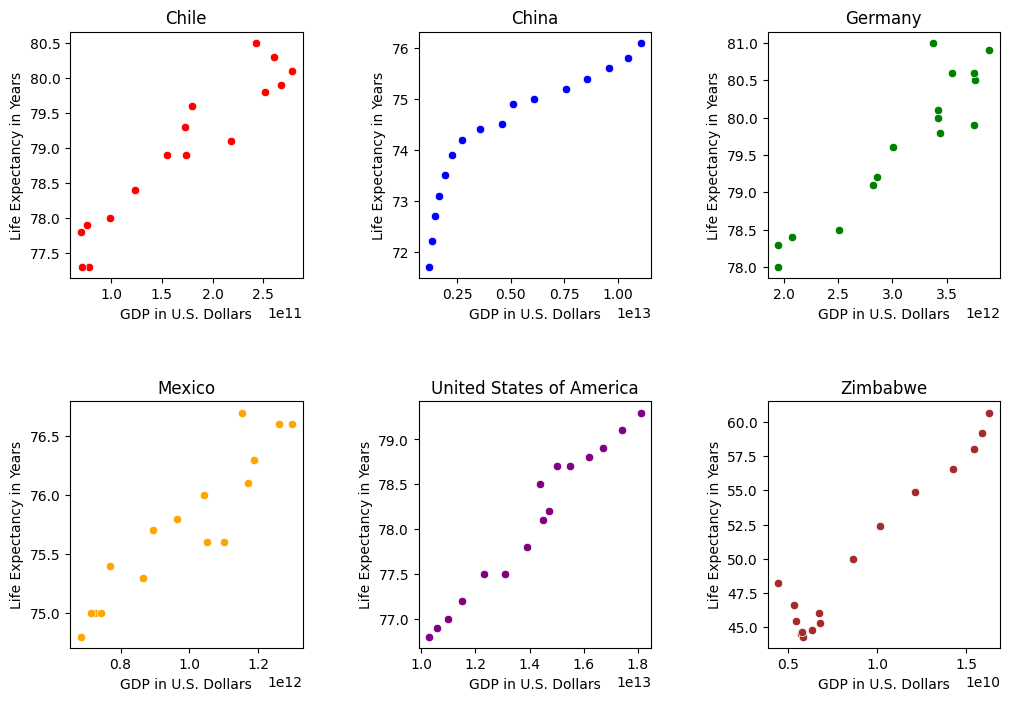

In [62]:
# Create a figure with 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for ax, country, color in zip(axs.flat, countries, colors):
    sns.scatterplot(data=data[data.country == country], x='gdp', y='life_expectancy', ax=ax, color=color)
    ax.set_title(country)
    ax.set(xlabel='GDP in U.S. Dollars', ylabel='Life Expectancy in Years')

# Adding space between the plots
plt.subplots_adjust(wspace=0.5, hspace=0.5)


# Show the figure
plt.show()


### OBSERVATIONS
- All the countries show a positive correlation between GDP and life expectancy
- USA shows the most straight scatterplot
- Zimbabwe and Germany show deflection towards the left and right of the plot respectively

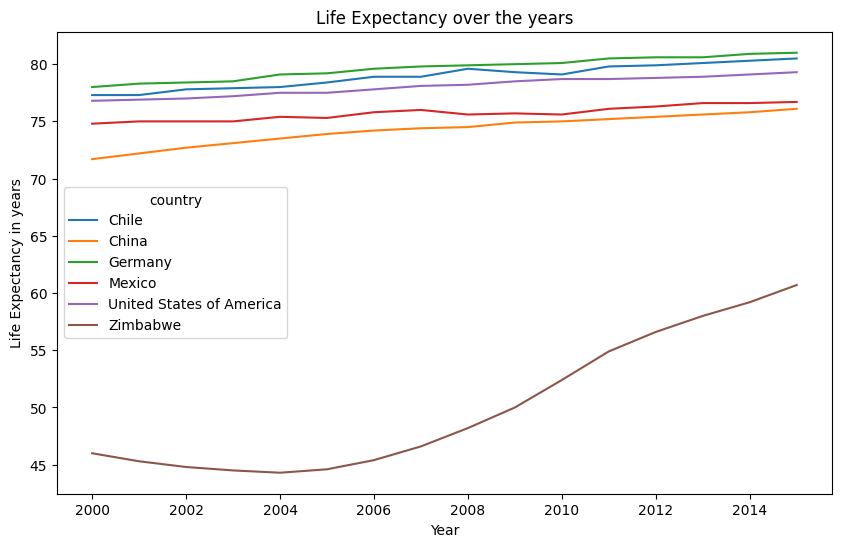

In [63]:
# Creating a common Line plot for all the countries (Life Expectancy over the years)
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='year', y='life_expectancy', hue='country')
plt.title('Life Expectancy over the years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy in years')
plt.show()


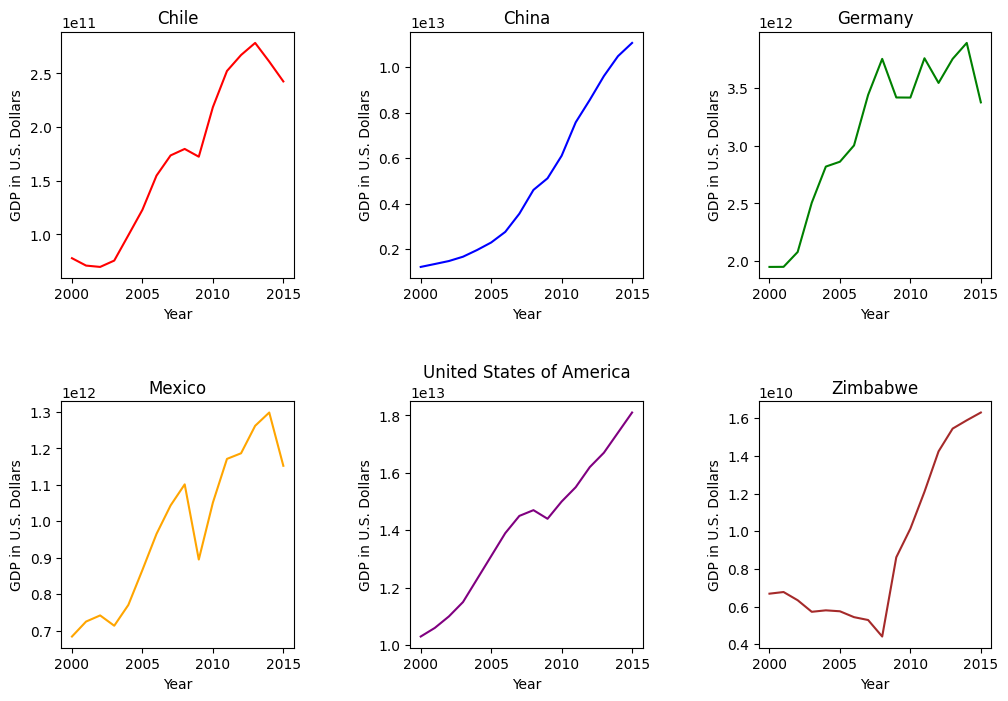

In [64]:
# Creating Sub Plots for each country (Year vs GDP)
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for ax, country, color in zip(axs.flat, countries, colors):
    sns.lineplot(data=data[data.country == country], x='year', y='gdp', ax=ax, color=color)
    ax.set_title(country)
    ax.set(xlabel='Year', ylabel='GDP in U.S. Dollars')

# Adding space between the plots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Show the figure
plt.show()

### OBSERVATIONS
- All the countries show an overall growth in GDP
- USA and China were the only ones to show a constant growth

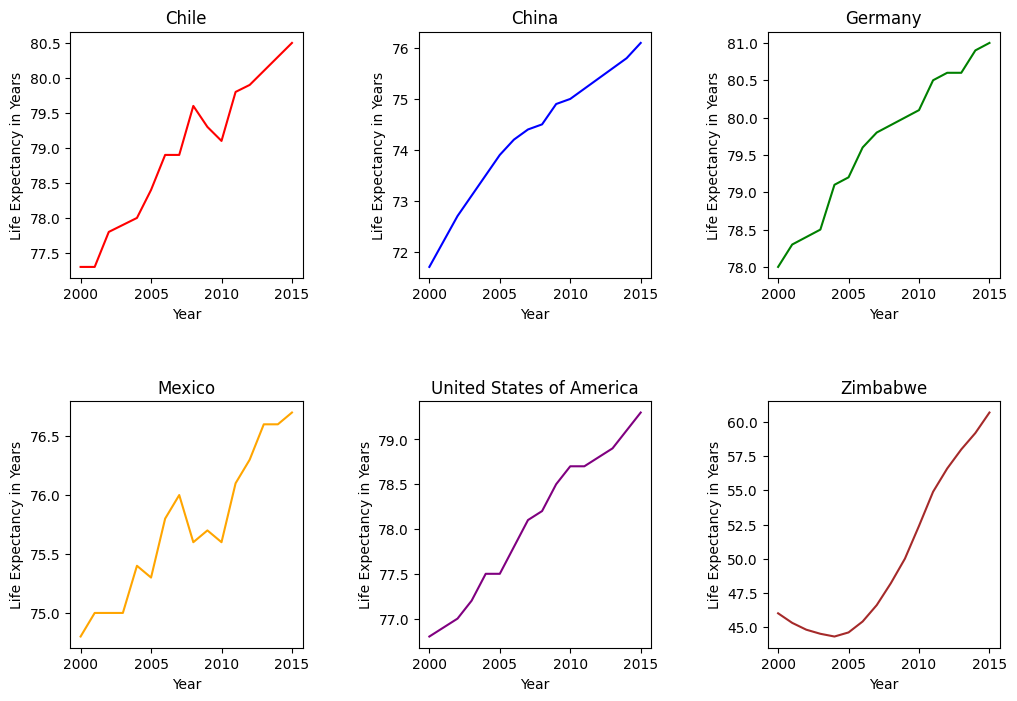

In [65]:
# Creating Sub Plots for each country (Year vs Life Expectancy)
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for ax, country, color in zip(axs.flat, countries, colors):
    sns.lineplot(data=data[data.country == country], x='year', y='life_expectancy', ax=ax, color=color)
    ax.set_title(country)
    ax.set(xlabel='Year', ylabel='Life Expectancy in Years')
    
# Adding space between the plots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Show the figure
plt.show()

### OBSERVATIONS
- All the countries show an overall growth in Life Expectancy

## 3. RUNNING TESTS TO CONFIRM CORRELATIONS FOUND

In [66]:
# Calculating the correlation between GDP and Life Expectancy for each country

print(f"{'COUNTRY':>25} : {'CORRELATION':<15}")
for country in countries:
    country_data = data[data.country == country]
    correlation, p = pearsonr(country_data.gdp, country_data.life_expectancy)
    print(f'{country:>25} : {correlation:<15.3f}')


                  COUNTRY : CORRELATION    
                    Chile : 0.950          
                    China : 0.909          
                  Germany : 0.933          
                   Mexico : 0.932          
 United States of America : 0.982          
                 Zimbabwe : 0.966          


### OBSERVATIONS
- The pearson coefficient is very high (> 0.9) for all the countries through which we can confirm that life expectancy and GDP have a strong positive correlation

In [67]:
# Calculating the correlation between Year and Life Expectancy for each country

print('Life Expectancy vs Year')
print(f"{'COUNTRY':>25} : {'CORRELATION':<15}")
for country in countries:
    country_data = data[data.country == country]
    correlation, p = pearsonr(country_data.year, country_data.life_expectancy)
    print(f'{country:>25} : {correlation:<15.3f}')
print('\n\n')
# Calculating the correlation between Year and GDP for each country

print('GDP vs Year')
print(f"{'COUNTRY':>25} : {'CORRELATION':<15}")
for country in countries:
    country_data = data[data.country == country]
    correlation, p = pearsonr(country_data.year, country_data.gdp)
    print(f'{country:>25} : {correlation:<15.3f}')


Life Expectancy vs Year
                  COUNTRY : CORRELATION    
                    Chile : 0.981          
                    China : 0.983          
                  Germany : 0.987          
                   Mexico : 0.950          
 United States of America : 0.992          
                 Zimbabwe : 0.924          



GDP vs Year
                  COUNTRY : CORRELATION    
                    Chile : 0.962          
                    China : 0.969          
                  Germany : 0.894          
                   Mexico : 0.937          
 United States of America : 0.990          
                 Zimbabwe : 0.838          


### OBSERVATIONS
- All the countries show a correlation for year with Life Expectancy and GDP
- It shows that for all countries, GDP and Life Expectancy increased over the years

# 4. COMPARING THE MEAN VALUES FOR THE VARIABLES

In [68]:
# Getting the mean values for GDP and Life Expectancy for each country

mean_gdp = data.groupby('country').gdp.mean()
mean_life_expectancy = data.groupby('country').life_expectancy.mean()

gdp_le_zip = zip(mean_gdp, mean_life_expectancy)
# Printing the mean values
print(f"{'COUNTRY':^25} : {'MEAN GDP (Tri)':<15} : {'MEAN LIFE EXPECTANCY':<15}")
for country, (gdp, life_expectancy) in zip(countries, gdp_le_zip):
    print(f'{country:>25} : {gdp/1e9:^15.3f} : {life_expectancy:^15.2f}')



         COUNTRY          : MEAN GDP (Tri)  : MEAN LIFE EXPECTANCY
                    Chile :     169.789     :      78.94     
                    China :    4957.714     :      74.26     
                  Germany :    3094.776     :      79.66     
                   Mexico :     976.651     :      75.72     
 United States of America :    14075.000    :      78.06     
                 Zimbabwe :      9.063      :      50.09     


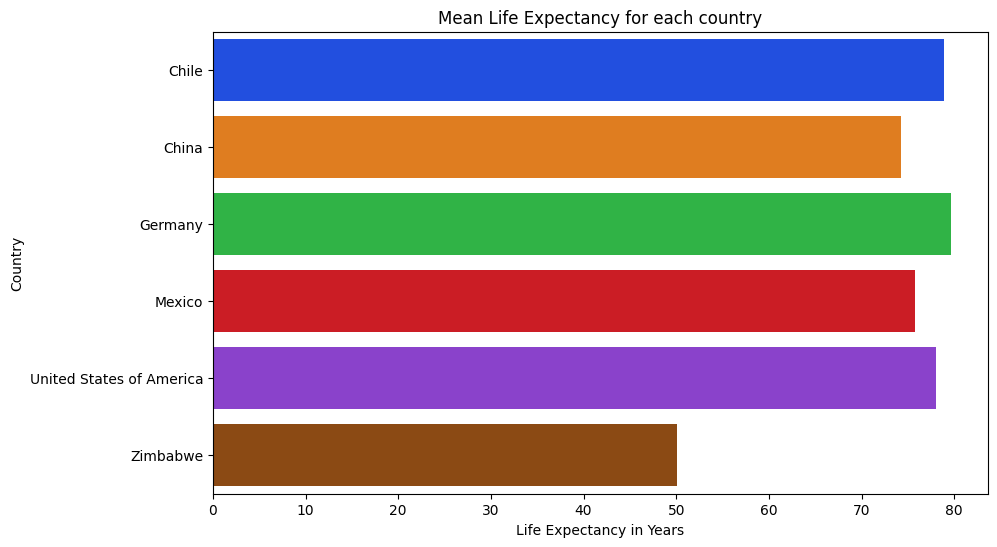

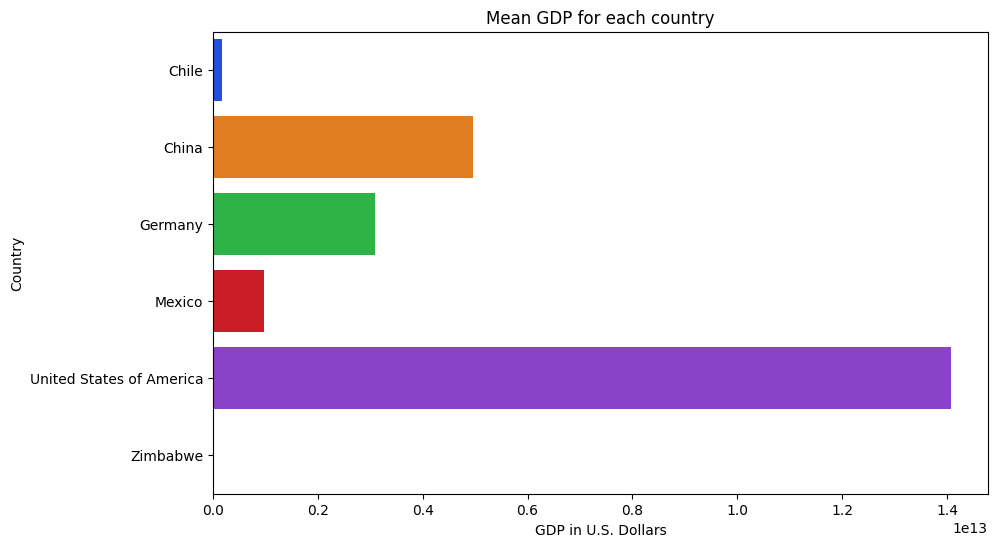

In [73]:
# Plotting the mean values for Life Expectancy for each country
plt.figure(figsize=(10, 6))
# Horizontal Bar Plot
sns.barplot(x=mean_life_expectancy, y=countries, palette= 'bright', hue = countries)
plt.title('Mean Life Expectancy for each country')
plt.xlabel('Life Expectancy in Years')
plt.ylabel('Country')
plt.show()

# Plotting the mean values for GDP for each country
plt.figure(figsize=(10, 6))
# Horizontal Bar Plot
sns.barplot(x=mean_gdp, y=countries, palette= 'bright', hue = countries)
plt.title('Mean GDP for each country')
plt.xlabel('GDP in U.S. Dollars')
plt.ylabel('Country')
plt.show()


### OBSERVATIONS
- The mean Life Expectancy at Birth is similar (within 70 and 80) for all the countries except Zimbabwe (around 50)
- USA has the highest GDP, much larger than the other countries
- Chile has a very low, only better than Zimbabwe in this data

# 5. COMPARING THE GROWTHS AMONG COUNTRIES

In [74]:
# Getting the percentage increase in GDP and Life Expectancy for each country


gdp_increase = (data[data.year == 2015].groupby('country').gdp.mean() - data[data.year == 2000].groupby('country').gdp.mean()) / data[data.year == 2000].groupby('country').gdp.mean() * 100

life_expectancy_increase = (data[data.year == 2015].groupby('country').life_expectancy.mean() - data[data.year == 2000].groupby('country').life_expectancy.mean()) / data[data.year == 2000].groupby('country').life_expectancy.mean() * 100

gdp_le_zip = zip(gdp_increase, life_expectancy_increase)
# Printing the percentage increase
print(f"{'COUNTRY':^25} : {'GDP INCREASE (%)':<15} : {'LIFE EXPECTANCY INCREASE (%)':<15}")
for country, (gdp, life_expectancy) in zip(countries, gdp_le_zip):
    print(f'{country:>25} : {gdp:^15.2f} : {life_expectancy:^15.2f}')


         COUNTRY          : GDP INCREASE (%) : LIFE EXPECTANCY INCREASE (%)
                    Chile :     211.48      :      4.14      
                    China :     813.42      :      6.14      
                  Germany :      73.11      :      3.85      
                   Mexico :      68.55      :      2.54      
 United States of America :      75.73      :      3.26      
                 Zimbabwe :     143.72      :      31.96     


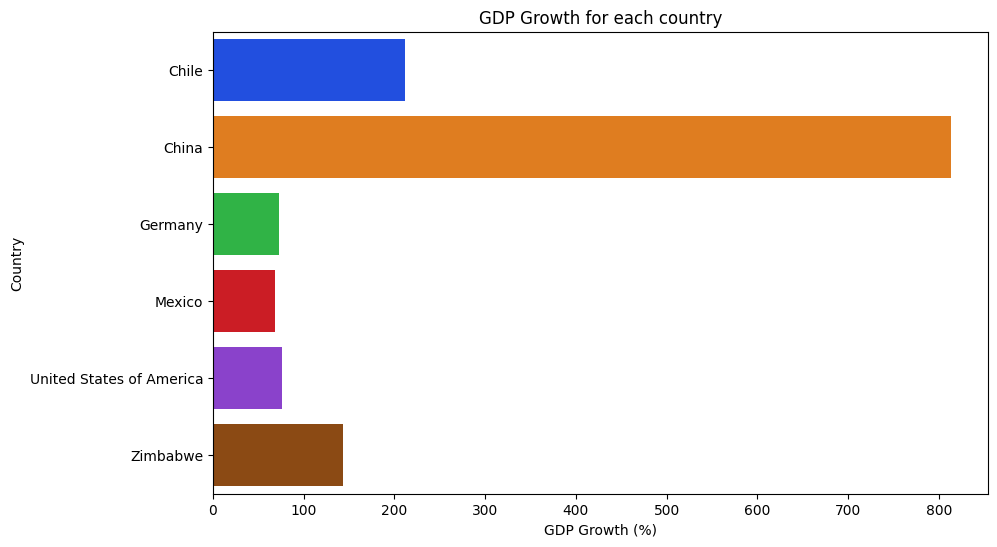

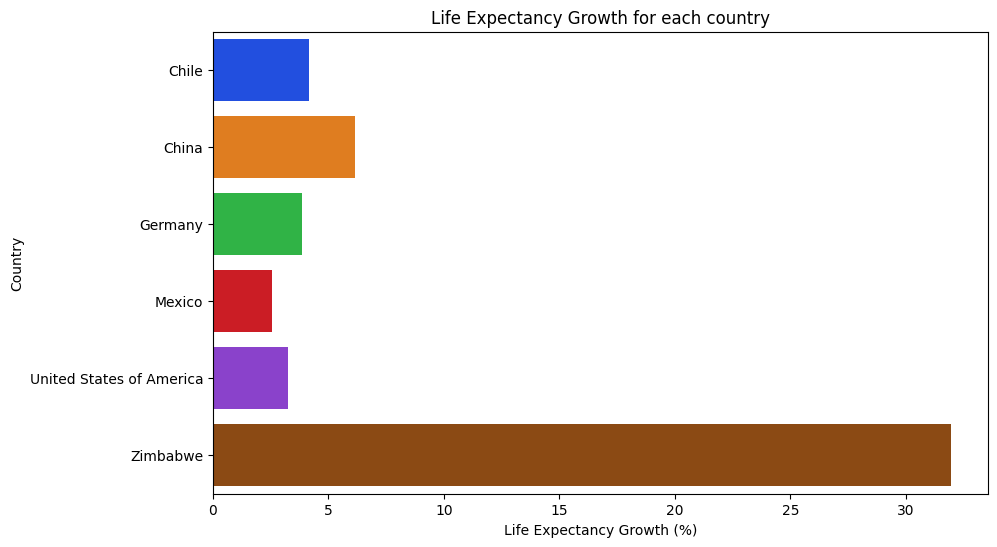

In [75]:
# Plotting the Growth in GDP and Life Expectancy for each country

plt.figure(figsize=(10, 6))
# Horizontal Bar Plot
sns.barplot(x=gdp_increase, y=countries, palette= 'bright', hue = countries)
plt.title('GDP Growth for each country')
plt.xlabel('GDP Growth (%)')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(10, 6))
# Horizontal Bar Plot
sns.barplot(x=life_expectancy_increase, y=countries, palette= 'bright', hue = countries)
plt.title('Life Expectancy Growth for each country')
plt.xlabel('Life Expectancy Growth (%)')
plt.ylabel('Country')
plt.show()



### OBSERVATIONS
- The biggest percentage growth in GDP was in China, followed by Chile and Zimbabwe
- The biggest percentage growth in Life Expectancy was in Zimbabwe, followed by China and Chile

### CALCULATING PERCENTAGE GROWTH PER YEAR PER VARIABLE

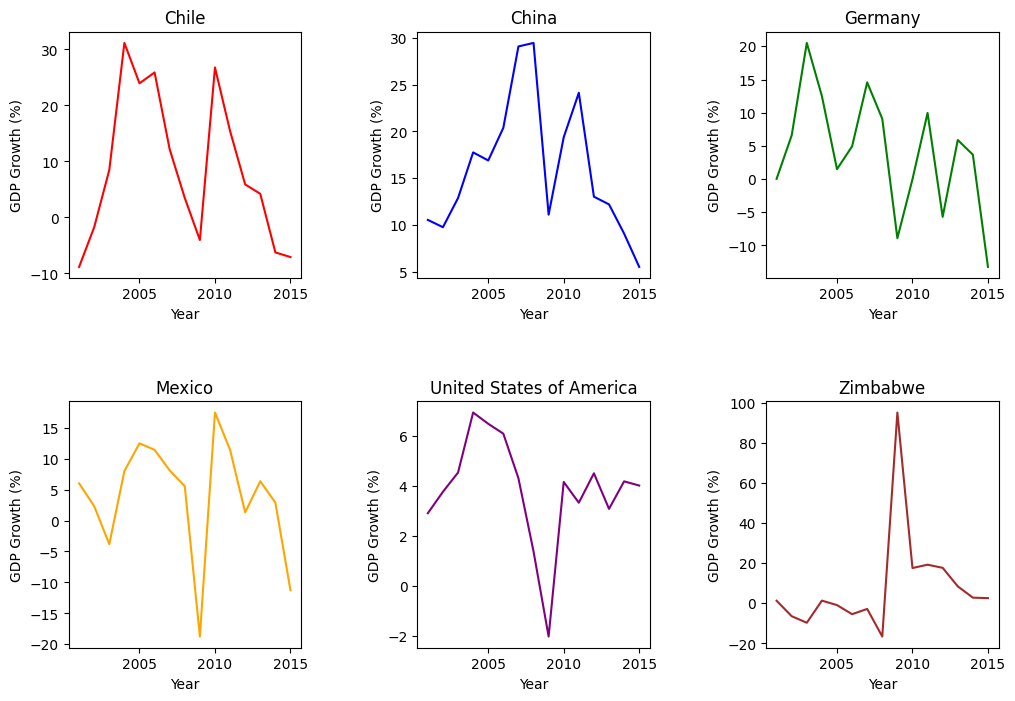

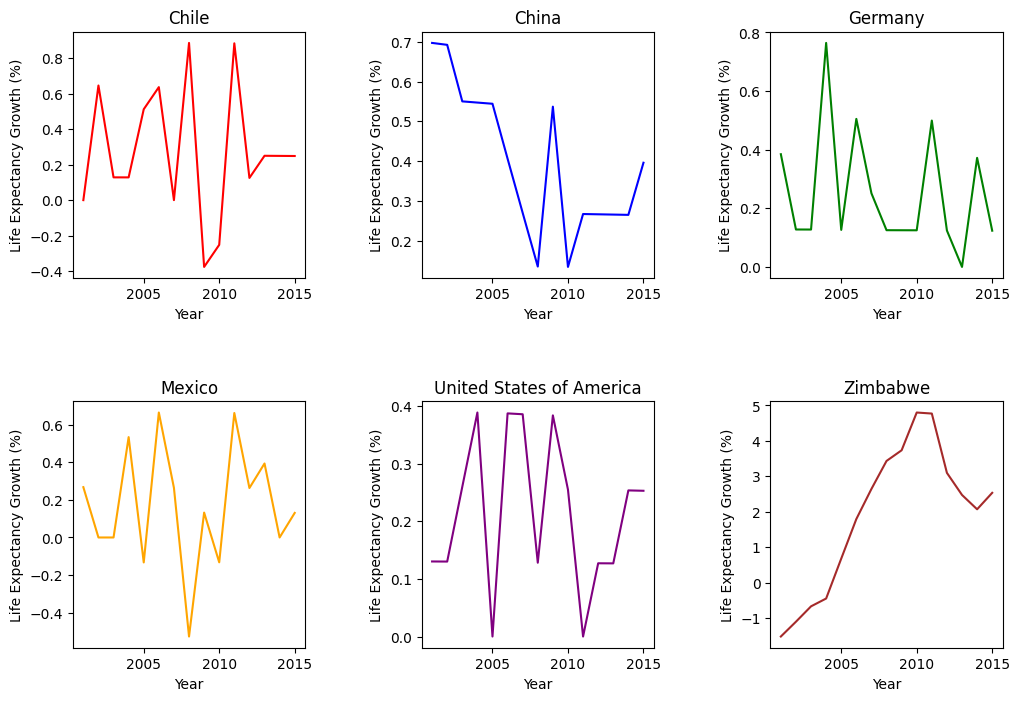

In [78]:
# Getting the percentage increase in GDP and Life Expectancy for each country for every year

data['gdp_increase'] = data.groupby('country').gdp.pct_change() * 100
data['life_expectancy_increase'] = data.groupby('country').life_expectancy.pct_change() * 100

# Plotting the Growth in GDP and Life Expectancy for each country for every year

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for ax, country, color in zip(axs.flat, countries, colors):
    sns.lineplot(data=data[data.country == country], x='year', y='gdp_increase', ax=ax, color=color)
    ax.set_title(country)
    ax.set(xlabel='Year', ylabel='GDP Growth (%)')

# Adding space between the plots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Show the figure
plt.show()

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for ax, country, color in zip(axs.flat, countries, colors):
    sns.lineplot(data=data[data.country == country], x='year', y='life_expectancy_increase', ax=ax, color=color)
    ax.set_title(country)
    ax.set(xlabel='Year', ylabel='Life Expectancy Growth (%)')

# Adding space between the plots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Show the figure
plt.show()


### OBSERVATIONS
- No conclusive relation except Zimbabwe constantly improving on Life Expectancy